In [1]:
import cv2
import numpy as np
import os
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import pickle
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Dropout,MaxPooling2D,Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
import seaborn as sns

In [2]:
# Import code from Kaggle (https://www.kaggle.com/code/achintyatripathi/emnist-letter-dataset-97-9-acc-val-acc-91-78/notebook)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
#/kaggle/input/emnist/emnist-letters-mapping.txt
testing_letter = pd.read_csv('Resources/EMNIST Letters/emnist-letters-test.csv') # Unable to load to github due to file size; downloadable at https://www.kaggle.com/code/achintyatripathi/emnist-letter-dataset-97-9-acc-val-acc-91-78/input?select=emnist-letters-test.csv"
training_letter = pd.read_csv('Resources/EMNIST Letters/emnist-letters-train.csv') # Unable to load to github due to file size; downloadable at https://www.kaggle.com/code/achintyatripathi/emnist-letter-dataset-97-9-acc-val-acc-91-78/input?select=emnist-letters-train.csv"

In [4]:
print(training_letter.shape)
print(testing_letter.shape)

(88799, 785)
(14799, 785)


In [5]:
#training_letters
y1 = np.array(training_letter.iloc[:,0].values)
x1 = np.array(training_letter.iloc[:,1:].values)
#testing_labels
y2 = np.array(testing_letter.iloc[:,0].values)
x2 = np.array(testing_letter.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)

(88799,)
(88799, 784)


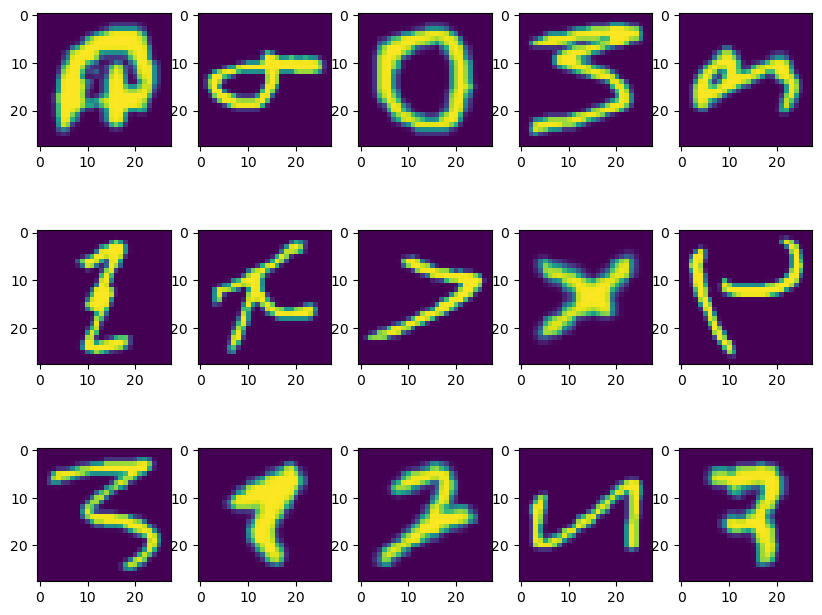

In [6]:
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))

In [7]:
# Normalise and reshape data
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

In [9]:
# Transform labels
number_of_classes = 27

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

In [10]:
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

In [11]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

c:\Users\shawn\anaconda3\envs\dev\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\shawn\anaconda3\envs\dev\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
MCP = ModelCheckpoint('Best_points.keras',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [14]:
history = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7408 - loss: 0.8539
Epoch 1: val_accuracy improved from -inf to 0.88806, saving model to Best_points.keras
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 55s 24ms/step - accuracy: 0.7408 - loss: 0.8538 - val_accuracy: 0.8881 - val_loss: 0.3489 - learning_rate: 0.0010
Epoch 2/10
2218/2220 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9100 - loss: 0.2739
Epoch 2: val_accuracy improved from 0.88806 to 0.89854, saving model to Best_points.keras
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 55s 25ms/step - accuracy: 0.9100 - loss: 0.2739 - val_accuracy: 0.8985 - val_loss: 0.3170 - learning_rate: 0.0010
Epoch 3/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9324 - loss: 0.2008
Epoch 3: val_accuracy improved from 0.89854 to 0.90721, saving model to Best_points.keras
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 55s 25ms/step - accuracy: 0.9324 - loss: 0.2008 - val_accuracy: 0.9072 - val_loss: 0.3065 - learning_rate: 0.0010
Epoch 4/10
2218/2220 ━━━━━━━━━━

c:\Users\shawn\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shawn\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shawn\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shawn\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

Text(0, 0.5, 'Accuray')

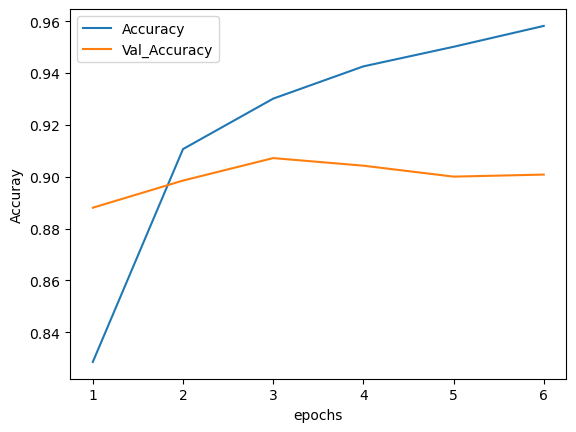

In [15]:
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

In [16]:
train_x2,test_x2,train_y2,test_y2 = train_test_split(train_images,y1,test_size=0.15,random_state = 42)

In [17]:
history1 = model.fit(train_x2,train_y2,epochs=10,validation_data=(test_x2,test_y2))

Epoch 1/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 0.9557 - loss: 0.1217 - val_accuracy: 0.9220 - val_loss: 0.2766
Epoch 2/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 0.9691 - loss: 0.0874 - val_accuracy: 0.9229 - val_loss: 0.2673
Epoch 3/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 0.9739 - loss: 0.0705 - val_accuracy: 0.9215 - val_loss: 0.2806
Epoch 4/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 0.9758 - loss: 0.0630 - val_accuracy: 0.9206 - val_loss: 0.3129
Epoch 5/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 0.9790 - loss: 0.0551 - val_accuracy: 0.9209 - val_loss: 0.3246
Epoch 6/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 0.9826 - loss: 0.0461 - val_accuracy: 0.9215 - val_loss: 0.3548
Epoch 7/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 0.9828 - loss: 0.0442 - val_accuracy: 0.9205 - val_loss: 0.3695
Epoch 8/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 0.9834 -

c:\Users\shawn\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shawn\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shawn\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shawn\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

Text(0, 0.5, 'Accuray')

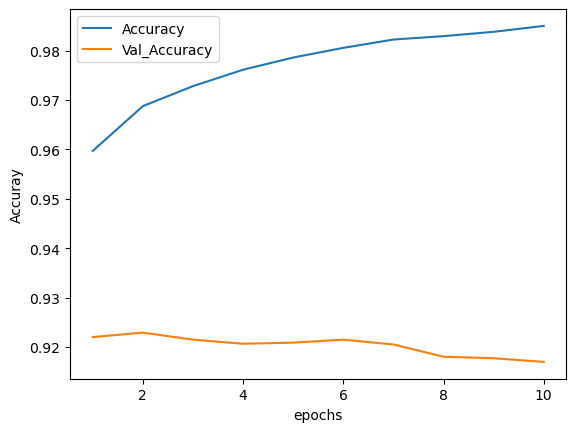

In [18]:
q = len(history1.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history1.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history1.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

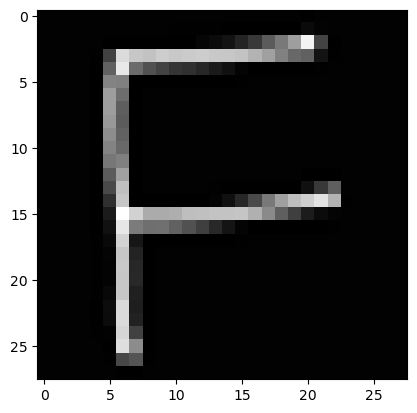

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Character: U
Prediction confidence: 0.49


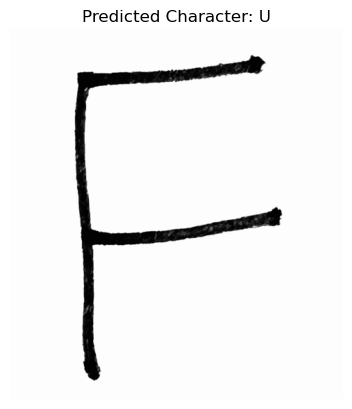

In [31]:
# source image
image_path = "Resources/Test Images/letter F.png"

# Define the class mapping for EMNIST ByClass
emnist_byclass_labels = [
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',  # Uppercase A-Z
    ]

# Define the image preprocessing function (similar to how it was done for the dataset)
def preprocess_image(image_path):
    # Load the image using PIL
    img = Image.open(image_path).convert('L')  # Convert to grayscale if needed
    img = ImageOps.invert(img) # Invert the image colors if the background is white and digits are black 
    img = img.resize((28, 28))  # Resize to 28x28 pixels (same as EMNIST)
    
    plt.imshow(img, cmap='gray') 
    plt.show()

    # Convert the image to a NumPy array and normalize it
    img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = img_array.reshape(1, 28, 28, 1)  # Reshape to (1, 28, 28, 1) for batch dimension
    
    return img_array

# Function to make a prediction on a single image
def predict_image(model, image_path):
    processed_image = preprocess_image(image_path)
    
    # Get model prediction (output probabilities for each class)
    predictions = model.predict(processed_image)
    
    # Find the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)[0]
    
    return predicted_class, predictions

# Function to decode predicted class index to character
def decode_prediction(predicted_class):
    return emnist_byclass_labels[predicted_class]

# usage:
predicted_class, predictions = predict_image(model, image_path)
predicted_character = decode_prediction(predicted_class)

print(f"Predicted Character: {predicted_character}")
print(f"Prediction confidence: {predictions[0][predicted_class]:.2f}")

# Visualize the image for confirmation
plt.imshow(np.array(Image.open(image_path)), cmap='gray')
plt.title(f"Predicted Character: {predicted_character}")
plt.axis('off')
plt.show()